<a href="https://colab.research.google.com/github/joyatiitr/COVID/blob/master/COVID19_trend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Repositry is created to help analyse the questions raised around spread of COVID19 pandemic

Few examples here
```
Is spread related to Population Density?
Is spread related to temprature?
is Spread related to GDP?
```



In [1]:
import pandas as pd
import numpy as np
import datetime



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


various Path used in this Notebook

In [0]:
baseURL= r"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
sitePath= '/content/drive/My Drive/Colab Notebooks/COVID19/site/'
dataPath='/content/drive/My Drive/Colab Notebooks/COVID19/data/'

In [0]:
def loadData(fileName):
    data = pd.read_csv(baseURL + fileName)
   # data['date'] = data['date'].astype('datetime64[ns]')
    return data

In [0]:
covidDataConfirmedT = loadData("time_series_covid19_confirmed_global.csv").rename(columns={'Country/Region':'Country_Region', 'Province/State':'Province_State'})
covidDataDeathsT= loadData("time_series_covid19_deaths_global.csv").rename(columns={'Country/Region':'Country_Region', 'Province/State':'Province_State'})
covidDataRecoveredT= loadData("time_series_covid19_recovered_global.csv").rename(columns={'Country/Region':'Country_Region', 'Province/State':'Province_State'})


Create Backup of data

In [0]:
covidDataConfirmedT.to_csv(dataPath+ 'covidDataConfirmedT.csv')
covidDataDeathsT.to_csv(dataPath+'covidDataDeathsT.csv')
covidDataRecoveredT.to_csv(dataPath+'covidDataRecoveredT.csv')

In [6]:
covidDataRecoveredT

,Province_State,Country_Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29,29,31,31,37,46,61,61
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,10,10,10
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
240,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
241,NaN,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
242,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Transpose Data to move Date to *Date Column*. 


In [7]:
covidDataConfirmed= covidDataConfirmedT.melt( id_vars=['Province_State','Country_Region','Lat', 'Long'],var_name="Date" ).rename(columns = {"value":"Confirmed"} )
covidDataDeaths= covidDataDeathsT.melt( id_vars=['Province_State','Country_Region','Lat', 'Long'],var_name="Date" ).rename(columns = {"value":"Deaths"} )
covidDataRecovered= covidDataRecoveredT.melt( id_vars=['Province_State','Country_Region','Lat', 'Long'],var_name="Date" ).rename(columns = {"value":"Recovered"} )
#.reset_index().rename(columns = {"level_0": "Date", 0:"Confirmed"} )
#A.sort_values(['Country_Region'],axis=0,inplace=True)
#for country in A.Country_Region:
  #print(country)
covidDataRecovered=covidDataRecovered.dropna()  
covidDataRecovered

,Province_State,Country_Region,Lat,Long,Date,Recovered
8,Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0
9,New South Wales,Australia,-33.8688,151.2093,1/22/20,0
10,Northern Territory,Australia,-12.4634,130.8456,1/22/20,0
11,Queensland,Australia,-28.0167,153.4000,1/22/20,0
12,South Australia,Australia,-34.9285,138.6007,1/22/20,0
...,...,...,...,...,...,...
17546,Montserrat,United Kingdom,16.7425,-62.1874,4/2/20,0
17559,Anguilla,United Kingdom,18.2206,-63.0686,4/2/20,0
17560,British Virgin Islands,United Kingdom,18.4207,-64.6400,4/2/20,0
17561,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,4/2/20,0


Set Date to Date type

In [0]:
covidDataConfirmed['Date']= covidDataConfirmed['Date'].astype('datetime64[ns]')
covidDataDeaths['Date']= covidDataDeaths['Date'].astype('datetime64[ns]')
covidDataRecovered['Date']= covidDataRecovered['Date'].astype('datetime64[ns]')

Join Data Frame with Confirmed, Recovered and Death information. *MM_Key* will be used to join with Weather Infromation

In [9]:
covidDataAll= covidDataConfirmed.merge(covidDataDeaths,how='inner').merge(covidDataRecovered, how='left')
covidDataAll['MM_key']= pd.DatetimeIndex(covidDataAll['Date']).month
covidDataAll 

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,MM_key
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,NaN,1
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,NaN,1
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,NaN,1
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,NaN,1
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,NaN,1
...,...,...,...,...,...,...,...,...,...
18571,NaN,Botswana,-22.328500,24.684900,2020-04-02,4,1,NaN,4
18572,NaN,Burundi,-3.373100,29.918900,2020-04-02,3,0,NaN,4
18573,NaN,Sierra Leone,8.460555,-11.779889,2020-04-02,2,0,NaN,4
18574,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,2020-04-02,2,0,0.0,4


Find unique countries in COVID19 data

In [10]:
countries = covidDataAll['Country_Region'].unique()
countries.sort()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

Add Day Index to identify start of events on timeseriese

In [0]:
dfCombi= pd.DataFrame(columns=covidDataAll.columns)
for country in countries:
    df= covidDataAll.loc[covidDataAll['Country_Region']==country]
    df= df.sort_values(by=['Date'], axis=0, ascending=True)
    df.reset_index(drop=True, inplace=True)
    df['day_no']= df.index
    dfCombi= dfCombi.append(df)

covidDataAll_1=dfCombi

In [12]:
covidDataAll_1.dtypes


Province_State            object
Country_Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                 object
Deaths                    object
Recovered                float64
MM_key                    object
day_no                   float64
dtype: object

In [13]:

covidDataAll_1['Confirmed']=covidDataAll_1['Confirmed'].astype(str).astype(int)
covidDataAll_1['Deaths']=covidDataAll_1['Deaths'].astype(str).astype(int)
#covidDataAll_1['Recovered']=covidDataAll_1['Recovered'].astype(np.int64)
covidDataAll_1['MM_key']=covidDataAll_1['MM_key'].astype(str).astype(int)
covidDataAll_1['day_no']=covidDataAll_1['day_no'].astype(np.int64)
covidDataAll_1.dtypes

Province_State            object
Country_Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                float64
MM_key                     int64
day_no                     int64
dtype: object

Load Global population data. Source: [worldpopulationreview](https://worldpopulationreview.com/countries/countries-by-density/
)

In [14]:

pop= pd.read_csv('/content/drive/My Drive/Colab Notebooks/COVID19/Global_Population_Density.csv')
pop.rename(columns={'name':'Country_Region', 'density_km2':'pop_density_km2','area':'country_area_km2','rank':'pop_density_rank' }, inplace=True)
pop.drop(columns=['densityMi2'], inplace=True)

pop

,pop_density_rank,Country_Region,pop_density_km2,pop2020,country_area_km2
0,1,Macau,21644.5000,649.335,30.00
1,2,Monaco,19426.7327,39.242,2.02
2,3,Singapore,8239.9183,5850.342,710.00
3,4,Hong Kong,6790.7437,7496.981,1104.00
4,5,Gibraltar,5615.1667,33.691,6.00
...,...,...,...,...,...
227,228,Namibia,3.0776,2540.905,825615.00
228,229,Western Sahara,2.2456,597.339,266000.00
229,230,Mongolia,2.0959,3278.290,1564110.00
230,231,Falkland Islands,0.2859,3.480,12173.00


GDP, current prices (Billions of U.S. dollars)
---
GDP Index of countries 2019
Source: [IMF](https://www.imf.org/external/datamapper/NGDPD@WEO/OEMDC/ADVEC/WEOWORLD) 



In [20]:
gdpImf = pd.read_csv(dataPath+'imf-dm-export-filtered2019.csv', encoding = "ISO-8859-1")
gdpImf.dropna(inplace=True)
gdpImf["2019"]= gdpImf["2019"].apply(pd.to_numeric, args=('coerce',))
gdpImf.rename(columns={'2019':'GDP_2019_bilUSD'}, inplace=True)
gdpImf.dtypes

Country_Region      object
GDP_2019_bilUSD    float64
dtype: object

Load monthly average temprature by country. Source: [Wikipedia](https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature)

In [30]:
globalTemp= pd.read_csv('/content/drive/My Drive/Colab Notebooks/COVID19/Temprature_Monthly_Average_2_mean.csv',encoding = "ISO-8859-1").drop(columns=['Year_avg']).melt('Country',var_name='Month')

globalTemp['Date_fake']= pd.to_datetime(globalTemp['Month'], format='%b')
globalTemp['MM_key']= pd.DatetimeIndex(globalTemp['Date_fake']).month

globalTemp.rename(columns={'Country':'Country_Region', 'value':'TemperatureC'}, inplace=True)
globalTemp.drop(columns=['Date_fake'], inplace=True)
globalTemp

,Country_Region,Month,TemperatureC,MM_key
0,Afghanistan,Jan,-2.300000,1
1,Albania,Jan,6.700000,1
2,Algeria,Jan,13.333333,1
3,Angola,Jan,26.700000,1
4,Antigua and Barbuda,Jan,25.400000,1
...,...,...,...,...
2071,Venezuela,Dec,20.700000,12
2072,Vietnam,Dec,20.625000,12
2073,Yemen,Dec,20.500000,12
2074,Zambia,Dec,22.100000,12


#Select Data 
**Prepare and select data** 
by Date Range 

Select Data in the given Day Range to analyse the relationship of COVID-19, population, temprature and gdp


In [0]:
startDay=0 
endDay= 100
topCount=50
confirmedCases= 2000
covidDataAll_1_cum= covidDataAll_1.loc[(covidDataAll_1['day_no']>=startDay) & (covidDataAll_1['day_no']<=endDay)]
covidDataAll_1_cum= covidDataAll_1.loc[(covidDataAll_1['Confirmed']>=confirmedCases) ]
covidDataAll_1_cum= covidDataAll_1_cum.groupby(by=['Country_Region']).sum().drop(columns=['Lat',	'Long',	'Recovered','MM_key',	'day_no'])




In [0]:
covidDataAll_1_pop= covidDataAll_1_cum.merge(pop, how='inner',on=['Country_Region'])
covidDataAll_1_pop.sort_values(by=['Confirmed'],axis=0,ascending=False, inplace=True)
covidDataAll_1_pop=covidDataAll_1_pop.head(topCount)
covidDataAll_1_pop.to_excel(sitePath+'covidPopStats.xlsx', sheet_name="PopulationStats")
covidDataAll_1_pop.sort_values(by=['pop_density_km2'], inplace=True)


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline



#**Is spread related to Population Density?**


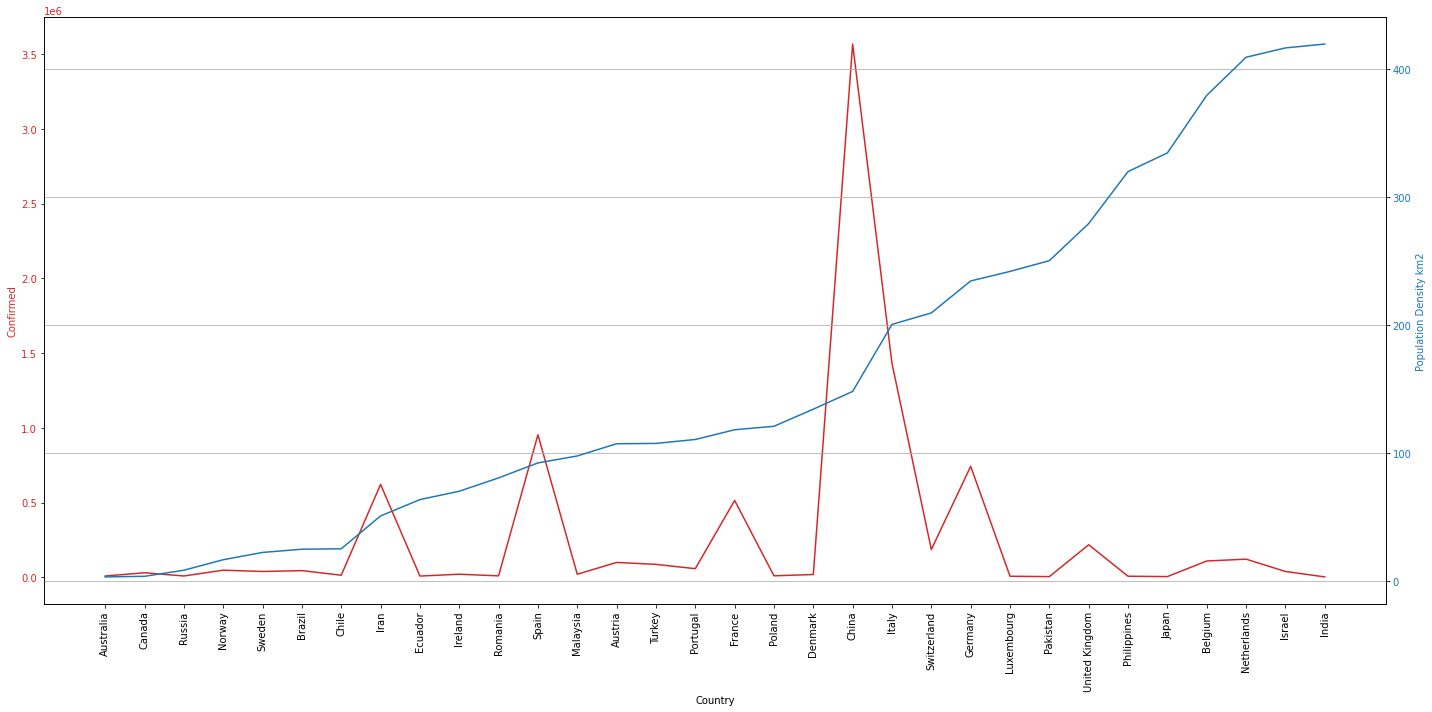

In [67]:

fig, ax1 = plt.subplots(figsize=(20, 10))
#fig = plt.figure(figsize=(10,5))
color = 'tab:red'
ax1.set_xlabel('Country')
ax1.set_ylabel('Confirmed', color=color)
ax1.plot(covidDataAll_1_pop.Country_Region,covidDataAll_1_pop.Confirmed, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Population Density km2', color=color)  # we already handled the x-label with ax1
ax2.plot(covidDataAll_1_pop.Country_Region,covidDataAll_1_pop.pop_density_km2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.grid(True)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(sitePath+'confirmVSpopdensity.png',quality=95)
plt.show()

#**Is spread related to temprature?** 


In [71]:
covidDataAll_1_cum= covidDataAll_1.loc[(covidDataAll_1['day_no']>=startDay) & (covidDataAll_1['day_no']<=endDay)]
covidDataAll_1_cum= covidDataAll_1.loc[(covidDataAll_1['Confirmed']>=confirmedCases) ]
covidDataAll_1_cum= covidDataAll_1_cum.groupby(by=['Country_Region','MM_key']).sum().drop(columns=['Lat',	'Long',	'Recovered','day_no'])
covidDataAll_1_temp= covidDataAll_1_cum.merge(globalTemp, how='inner',on=['Country_Region','MM_key'])
covidDataAll_1_temp.sort_values(by=['MM_key'],axis=0,ascending=True, inplace=True)
covidDataAll_1_temp=covidDataAll_1_temp.loc[covidDataAll_1_temp['Confirmed']>2000]
covidDataAll_1_temp = covidDataAll_1_temp.groupby(by=['Country_Region']).agg( totalConfirmed= pd.NamedAgg(column='Confirmed', aggfunc='sum'),
                                                                              totalDeaths= pd.NamedAgg(column='Deaths', aggfunc='sum'),
                                                                             avgTempratureC= pd.NamedAgg(column='TemperatureC', aggfunc=np.mean) )
covidDataAll_1_temp.sort_values(by=['avgTempratureC'], inplace=True)
covidDataAll_1_temp.to_excel(sitePath+'covidTempStats.xlsx', sheet_name="TemperatureStats")
covidDataAll_1_temp.reset_index(inplace=True)
covidDataAll_1_temp

,Country_Region,totalConfirmed,totalDeaths,avgTempratureC
0,Canada,30268,274,-2.303333
1,Russia,8662,71,-1.829167
2,Norway,47590,296,1.983333
3,Sweden,38892,1393,2.350000
4,China,3568218,146470,5.260000
5,Denmark,18572,583,5.600000
6,Poland,9866,164,5.750000
7,Luxembourg,6984,82,6.950000
8,Switzerland,185881,3548,7.050000
9,Germany,742566,5896,7.325000


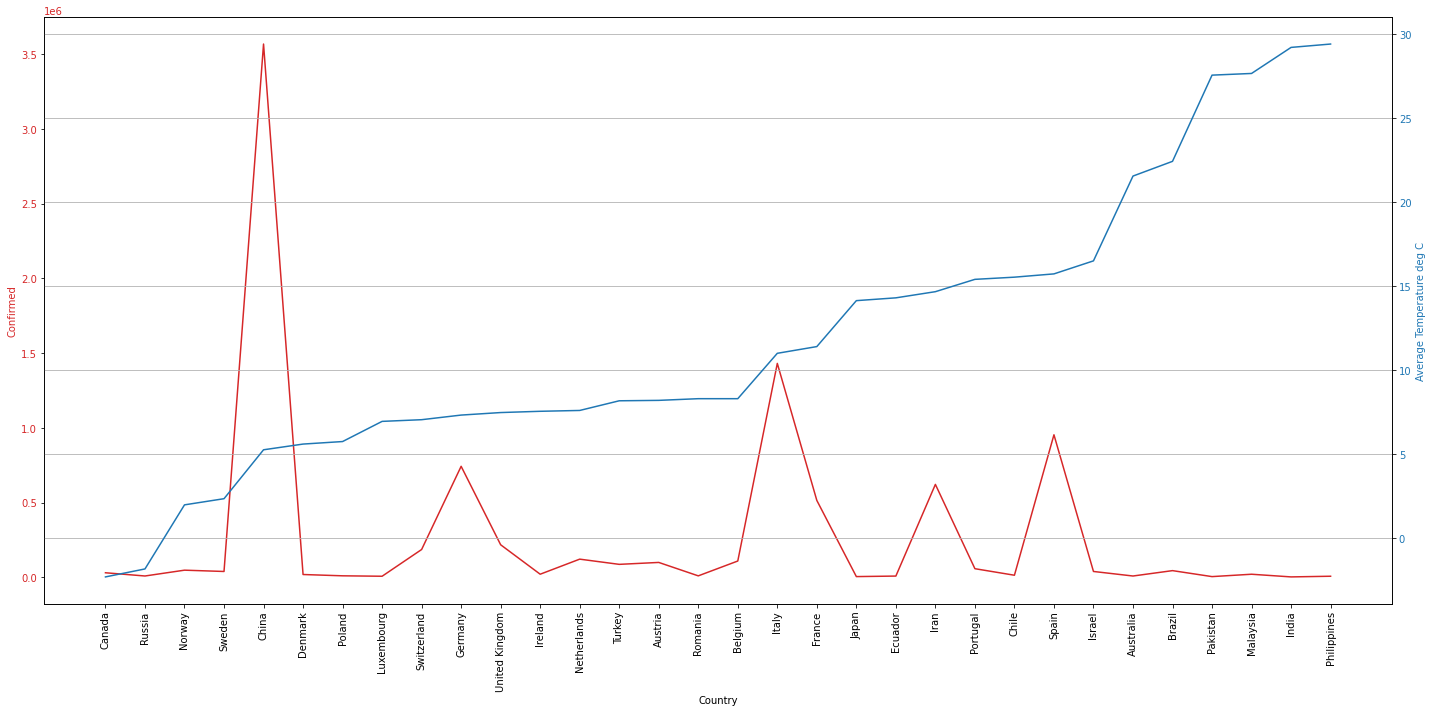

In [72]:
fig, ax1 = plt.subplots(figsize=(20, 10))
#fig = plt.figure(figsize=(10,5))
color = 'tab:red'
ax1.set_xlabel('Country')
ax1.set_ylabel('Confirmed', color=color)
ax1.plot(covidDataAll_1_temp.Country_Region,covidDataAll_1_temp.totalConfirmed, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average Temperature deg C', color=color)  # we already handled the x-label with ax1
ax2.plot(covidDataAll_1_temp.Country_Region,covidDataAll_1_temp.avgTempratureC, color=color)
ax2.tick_params(axis='y', labelcolor=color)

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.grid(True)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(sitePath+'confirmVStempratureC.png',quality=95)
plt.show()

#**is Spread related to GDP?**